# Curve Fitting

Fit a curve as closely as possible to a set of given points.


## Motivation

When we have many noisy measurements, we might want to fit a curve of a particular shape to approximate the "real" or "ideal" response curve independent of the noise of each particular measurement.

When the individual measures are known to be very precise, we might still need to do curve fitting. The intention here can be to simplify the representation of a complex function, if we know it. If we don't, generating a mathematical expression that passes through all the points will allow us to _interpolate_, ie, to evaluate the function at points for which we have no data.

# Regression

## Linear Regression

We want to fit a line of the general form

$$y = ax + b$$

to a set of points $(x_1,y_1), (x_2,y_2), (x_3,y_3),\ldots, (x_n,y_n)$

![Linear Regression](https://uc-r.github.io/public/images/analytics/regression/sq.errors-1.png)

If we express those points as 

$$y_i = \beta_0 + \beta_1 x_i + e_i$$ 

We have an objective for an optimization problem: minimize the error terms $e_i$. More precisely, we'll minimize the square errors.

$$\min_{\beta_0, \beta_1}\sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \beta_0 -\beta_1x_i)^2$$

The curve that best fits our n points will have slope and intercept:

$$ \widehat{\beta_1} = \frac{\sum x_iy_i - n \bar{x}\bar{y}}{\sum x_i^2 - n \bar{x}^2}$$

$$\widehat{\beta_0} = \bar{y} - \widehat{\beta_1} \bar{x}$$

### Linear Regression with Python

Very easy to do with the [scikit-learn](https://scikit-learn.org/) package.

scikit-learn works flawlessly with numpy and also allows us to fit Machine Learning models that are a lot more flexible, like Random Forests or Artificial Neural Networks.

#### Example 

Create random points that approximately fit the line

$$y = 2x + 10$$

Plot them, fit a line using `LinearRegression` from the `sklearn.linear_model` package, and plot both the points and the line together.

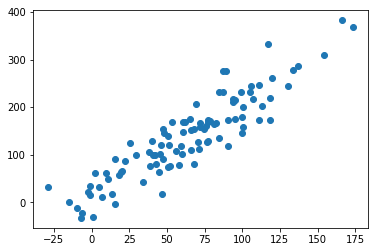

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


xs = 40 * np.random.randn(100) + 60
jitter = 40 * np.random.randn(100)
ys = 2 * xs + 10 + jitter

plt.scatter(xs, ys);

In [18]:
lr = LinearRegression()

dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [19]:
lr.fit(xs.reshape(-1, 1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
lr.coef_, lr.intercept_

(array([1.9022046]), 17.78876625286175)

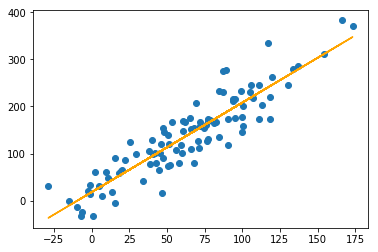

In [21]:
plt.scatter(xs, ys);
estimated_ys = lr.coef_ * xs + lr.intercept_
plt.plot(xs, estimated_ys, c='orange')

### Multivariable linear regression with Python

Same thing, with more dimensions

In [22]:
xs = np.random.randn(50, 2) * 40

In [23]:
ys = 5 * xs[:,0] - 7 * xs[:, 1] + 400
noise = np.random.randn(len(ys)) * 100
ys = xs.dot(np.array([5, -7])) + 400 + noise

In [24]:
lr.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lr.coef_, lr.intercept_

(array([ 4.59749888, -7.14322881]), 403.196773270737)

## Polynomial Regression

It can be posed as a simple extension of linear regression, with new synthetic variables.

Then we can express it in vectorial form.


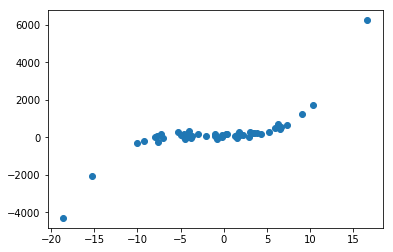

In [26]:
npoints = 50

xs = np.random.randn(npoints) * 5
noise = np.random.randn(npoints) * 100
ys = xs ** 3 + 6 * xs ** 2 - 4 * xs + 100 + noise

plt.scatter(xs, ys)

In [27]:
synthetic_variables = np.zeros((npoints, 3))
synthetic_variables[:,0] = xs
synthetic_variables[:,1] = xs ** 2
synthetic_variables[:,2] = xs ** 3

lr.fit(synthetic_variables, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lr.coef_, lr.intercept_

(array([-4.14205068,  5.82554135,  1.00475175]), 87.28379027266573)

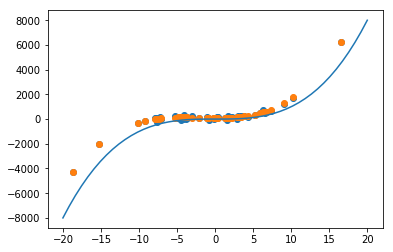

In [34]:
estimated_ys = synthetic_variables.dot(lr.coef_) + lr.intercept_

xs_axis = np.linspace(-20,20)
synthetic_xs = np.zeros((len(xs_axis), 3))
synthetic_xs[:,0] = xs_axis
synthetic_xs[:,1] = xs_axis ** 2
synthetic_xs[:,2] = xs_axis ** 3
ordered_ys = synthetic_xs.dot(lr.coef_) + lr.intercept_


plt.scatter(xs, ys)
plt.scatter(xs, estimated_ys)
plt.plot(xs_axis, synthetic_xs[:,2]);

In [76]:
synthetic_variables[:3]

array([[ -2.70025359,   7.29136943, -19.68854645],
       [  1.7535831 ,   3.07505368,   5.39236215],
       [  0.61853775,   0.38258895,   0.23664571]])

In [35]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)

synth_by_pf = pf.fit_transform(xs.reshape(-1,1))
synth_by_pf[:3]

array([[  -7.05251437,   49.73795898, -350.77767059],
       [  -7.65603118,   58.61481348, -448.75683986],
       [  -4.15865749,   17.29443209,  -71.9216195 ]])

In [36]:
multivariate_xs = np.random.randn(50, 4) * 40
multivariate_synthetics = pf.fit_transform(multivariate_xs)
multivariate_synthetics.shape

(50, 34)

## Other Regression algorithms in `scikit-learn`

[scikit-learn] is an extremely powerful library for Python Machine Learning. It has a well defined API that lets you easily swap learning algorithms.

[scikit-learn]: https://scikit-learn.org/stable/tutorial/basic/tutorial.html

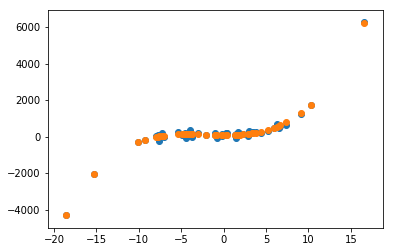

In [37]:
estimated_ys = lr.predict(synthetic_variables)

plt.scatter(xs, ys)
plt.scatter(xs, estimated_ys)

/home/dani/anaconda3/envs/numerical_methods/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


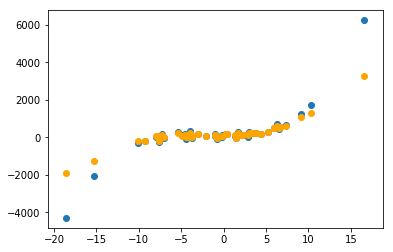

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(synthetic_variables, ys)
estimated_ys = rf.predict(synthetic_variables)

plt.scatter(xs, ys)
plt.scatter(xs, estimated_ys, c='orange')

# Interpolation

Consists of obtaining the only function of a particular family that passes through every point in a set, in order to estimate the value at intermediate points that we are not able to observe.

In order to interpolate a polynomial of degree $n$, we need at least $n + 1$ points. With that number of points, there is only one polynomial that fits.

#### Example

Estimate $ln (2)$ using linear interpolation.

* First, perform the computation by interpolating between ln(1) = 0 and ln(6) = 1.791759.
* Then, repeat the procedure, but use a smaller interval from ln(1) to ln(4) = 1.386294.

Note that the true value of $ln(2)$ is 0.6931472.

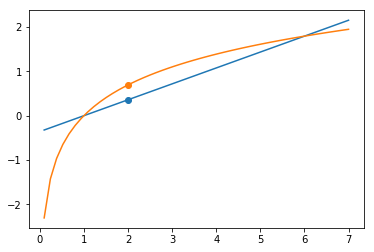

In [50]:
x_0, x_1 = 1, 6
a = (np.log(x_0) - np.log(x_1)) / (x_0 - x_1)
b = np.log(x_0) - a * x_0

xs = np.linspace(0.1, 7)
ys = a * xs + b
estimate = a * 2 + b

plt.plot(xs, ys)
plt.plot(xs, np.log(xs))
plt.scatter(2, estimate)
plt.scatter(2, np.log(2))

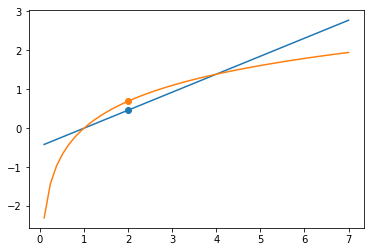

In [51]:
x_0, x_1 = 1, 4
a = (np.log(x_0) - np.log(x_1)) / (x_0 - x_1)
b = np.log(x_0) - a * x_0

xs = np.linspace(0.1, 7)
ys = a * xs + b
estimate = a * 2 + b

plt.plot(xs, ys)
plt.plot(xs, np.log(xs))
plt.scatter(2, estimate)
plt.scatter(2, np.log(2))

## Polynomial Interpolation

We can fit a polynomial of degree n if we have n + 1 data points. Then we can use it to interpolate between those points.

#### Example

Now estimate $ln (2)$ using quadratic interpolation. Use the points:

* $ln(1) = 0$
* $ln(4) = 1.386294$
* $ln(6) = 1.791759$

Note that the true value of $ln(2)$ is 0.6931472.

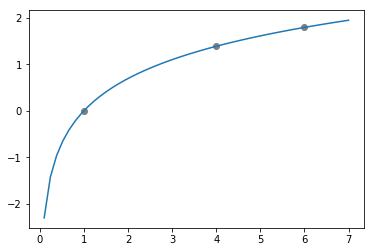

In [58]:
input_xs = np.array([1, 4, 6])
input_ys = np.log(input_xs)

plt.plot(xs, np.log(xs))
plt.scatter(input_xs, input_ys,c='grey')

In [53]:
def gauss_jordan(A, B):
    AB = np.concatenate((A, B.reshape(-1,1)), axis=1)
    n = A.shape[0]
    
    for row in range(n):
        others = list(range(n))
        others.remove(row)
        
        for other_row in others:
            # Eliminate column row from other rows
            AB[other_row] = AB[other_row] - AB[row] * AB[other_row,row] / AB[row,row]

    # normalize 
    for row in range(n):
        
        AB[row] = AB[row] / AB[row,row]
    
    return AB


In [60]:
AB = np.array([[input_xs[0] ** 2,input_xs[0], 1, np.log(input_xs[0])],
              [input_xs[1] ** 2,input_xs[1], 1, np.log(input_xs[1])],
              [input_xs[2] ** 2,input_xs[2], 1, np.log(input_xs[2])]])
AB

array([[ 1.        ,  1.        ,  1.        ,  0.        ],
       [16.        ,  4.        ,  1.        ,  1.38629436],
       [36.        ,  6.        ,  1.        ,  1.79175947]])

In [62]:
result = gauss_jordan(AB[:,:3], AB[:,3])
coefficients = result[:,3]
coefficients

array([-0.05187311,  0.72146369, -0.66959057])

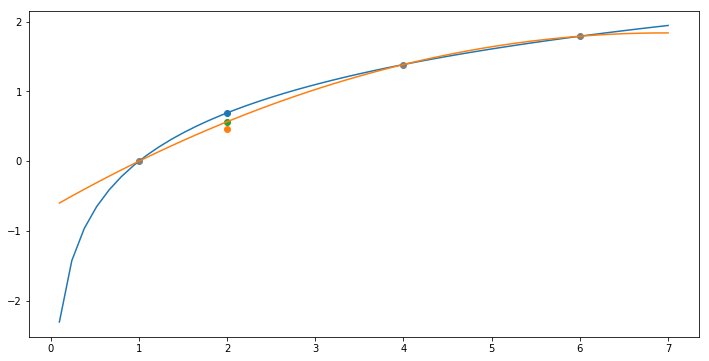

In [73]:
approximation =  coefficients[0] * xs ** 2 + coefficients[1] * xs + coefficients[2]
quadratic_estimate =coefficients[0] * 2 ** 2 + coefficients[1] * 2 + coefficients[2]

plt.plot(xs, np.log(xs))
plt.scatter(input_xs, input_ys,c='grey')
plt.plot(xs, approximation)
plt.scatter(2, np.log(2))
plt.scatter(2, estimate)
plt.scatter(2, quadratic_estimate)
plt.gcf().set_size_inches(12, 6)

## Spline Interpolation

Imagine we have 10 points. Rather than fit a single polynomial of degree 9, we can get a better result if we fit a different polynomial to each segment between two points. 

If we want to fit $n$ second order polynomials like this:

$$f_i(x) = a_i x^2 + b_i x + c_i$$

We will need to solve a linear system which has $3n$ equations. We can specify constraints which will each be represented by an equation in the system. In general, they will be restrictions on the values of the polynomials and their derivatives at the knots. Specifically:

* The function values of adjacent polynomials must be equal at the interior knots.
* The first and last functions must pass through the end points.
* The first derivatives at the interior knots must be equal.
* Assume that the second derivative is zero at the first point


#### Example

Fit the data in the following table using linear splines. Evaluate the function in x = 5.

|x|f(x)|
|---|---|
|3.0 |2.5|
|4.5 |1.0|
|7.0 |2.5|
|9.0 |0.5|

#### Example

Fit quadratic splines to the same data used in the previous example. Use the results to approximate the value of the underlying function at x = 5.

|x|f(x)|
|---|---|
|3.0 |2.5|
|4.5 |1.0|
|7.0 |2.5|
|9.0 |0.5|

In [96]:
AB = np.array([9, 3, 1, 0, 0, 0, 0, 0, 0, 2.5,
               4,5**2, 4.5, 1, 0,0,0,0,0,0, 1,
               0, 0, 0, 4.5**2, 4.5, 1, 0,0,0, 1,
               0, 0, 0, 7**2, 7, 1,0,0,0, 2.5,
               0, 0, 0, 0, 0, 0, 7**2, 7, 1, 2.5,
               0, 0, 0, 0, 0, 0,9**2, 9, 1, 0.5,
               2*4.5, 1, 0, -2*4.5, -1, 0, 0, 0, 0, 0,
               0, 0, 0, 2*7, 7, 0, -2*7, -7, 0, 0,
               1, 0, 0, 0, 0, 0, 0, 0 , 0]).reshape(-1,9)

AB

array([[  9.  ,   3.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  2.5 ,   4.  ,  25.  ,   4.5 ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,  20.25,   4.5 ,
          1.  ],
       [  0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,  49.  ,
          7.  ],
       [  1.  ,   0.  ,   0.  ,   0.  ,   2.5 ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.  ,  49.  ,   7.  ,   1.  ,   2.5 ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.  ,   0.  ,  81.  ,   9.  ,   1.  ,   0.5 ,   9.  ,
          1.  ],
       [  0.  ,  -9.  ,  -1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.  ,  14.  ,   7.  ,   0.  , -14.  ,  -7.  ,   0.  ,
          0.  ],
       [  1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ]])

#### Example

Fit cubic splines to the same data used in the previous example. Use the results to approximate the value of the underlying function at x = 5.

|x|f(x)|
|---|---|
|3.0 |2.5|
|4.5 |1.0|
|7.0 |2.5|
|9.0 |0.5|

# Problems

#### Exercise

Estimate the common logarithm of 10 using linear interpolation.
* Interpolate between $log(8)= 0.9030900$ and $log(12) = 1.0791812$.
* Interpolate between $log(9)= 0.9542425$ and $log(11) = 1.0413927$. 

For each of the interpolations, compute the percent relative error based on the true value.

#### Exercise

Use the portion of the given steam table for superheated $H_2O$ at $200 MPa$ to 

* Find the corresponding entropy s for a specific volume v of 0.108 m 3 /kg with linear interpolation
* Find the same corresponding entropy using quadratic interpolation

| $v (m^3/kg)$ | $s(kJ/kg\cdot K)$ |
|---|---|
|0.10377|6.4147|
|0.11144|6.5453|
|0.1254|6.7664|

#### Exercise

The following data defines the sea-level concentration of
dissolved oxygen for fresh water as a function of temperature:

|$T,ºC$|$o, mg/l$|
|------|-----------|
|0|14.621|
|8|11.843|
|16|9.870|
|24|8.418|
|32|7.305|
|40|6.413|

Estimate $o(27)$ using 
* Linear interpolation
* Cubic splines. 

Note that the exact result is $7.986 mg/L$.

# Further Reading

[An introduction to scikit-learn]

[An introduction to scikit-learn]: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html